In [3]:
csv_path = "/kaggle/input/jena-climate/jena_climate_2009_2016.csv"

In [4]:
with open(csv_path) as f:
    data = f.read()

In [9]:
lines = data.split('\n')
len(lines)

420552

In [13]:
header = lines[0].split(',')
lines = lines[1:]

In [200]:
len(header)
header

['"Date Time"',
 '"p (mbar)"',
 '"T (degC)"',
 '"Tpot (K)"',
 '"Tdew (degC)"',
 '"rh (%)"',
 '"VPmax (mbar)"',
 '"VPact (mbar)"',
 '"VPdef (mbar)"',
 '"sh (g/kg)"',
 '"H2OC (mmol/mol)"',
 '"rho (g/m**3)"',
 '"wv (m/s)"',
 '"max. wv (m/s)"',
 '"wd (deg)"']

In [55]:
print(lines[0])
print(lines[-1])

01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.90


In [144]:
float_data = np.zeros((len(lines), len(header)-1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i,:] = values

In [175]:
float_data.shape

(420551, 14)

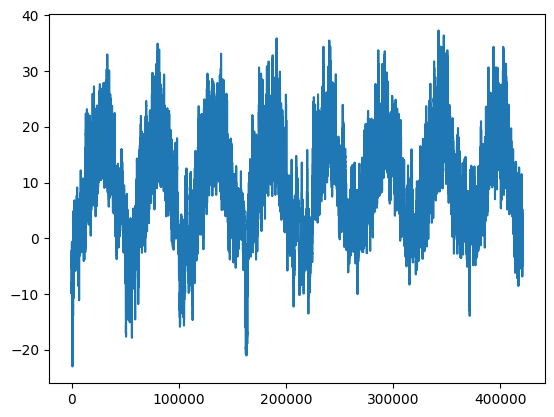

In [15]:
from matplotlib import pyplot as plt
temp = float_data[:,1] #<1> temerature in celsius
plt.plot(range(len(temp)), temp)
plt.show()

In [67]:
# print(header.split(','))

def get_day_data(day):
#     print("Date Time,           Temp")
    x_time = []
    y_temp = []
    for i in range(day*144, (day+1)*144, 6):
        data = lines[i].split(',')
#         print(data[0], float(data[2]))
        x_time.append(data[0])
        y_temp.append(float(data[2]))
    return x_time, y_temp

def plot_day(x_time, y_temp_range, day):
    plt.title(f"Day: {day}")
#     plt.plot(x_time, y_temp_range)
    plt.plot(y_temp_range)
#     plt.scatter(x_time, y_temp_range)
    plt.xticks(rotation=90)
#     plt.show()

-6.847499999999999
-3.7525
-5.3725
-1.3537499999999998
-4.75375


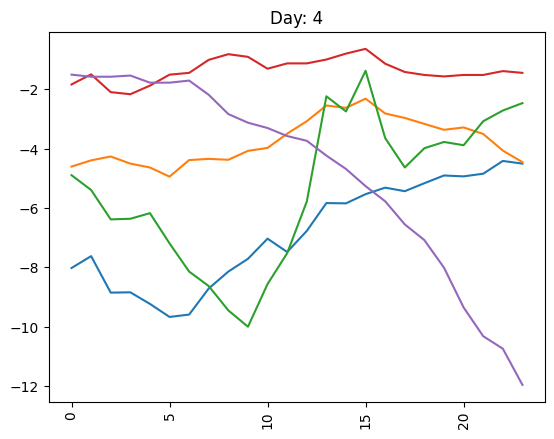

In [80]:
for i in range(5):
    day = i
    x_time, y_temp = get_day_data(day=day)
    plot_day(x_time, y_temp, day=day)
    print(np.mean(y_temp))

In [64]:
420552/144/365 # 8 - of years of data
420552/144 # 2920 days
420552 # data sampled

2920.5

0 -6.847499999999999
365 -3.8241666666666667
730 -4.1975
1095 1.7079166666666667
1460 6.824999999999999
1825 1.195
2190 -3.3945833333333333
2555 3.3783333333333334


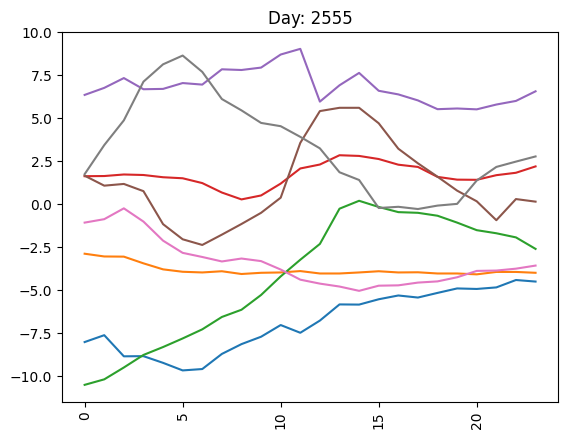

In [81]:
for i in range(0, 2920, 365):
    day = i
    x_time, y_temp = get_day_data(day=day)
    plot_day(x_time, y_temp, day=day)
    print(day, np.mean(y_temp))    

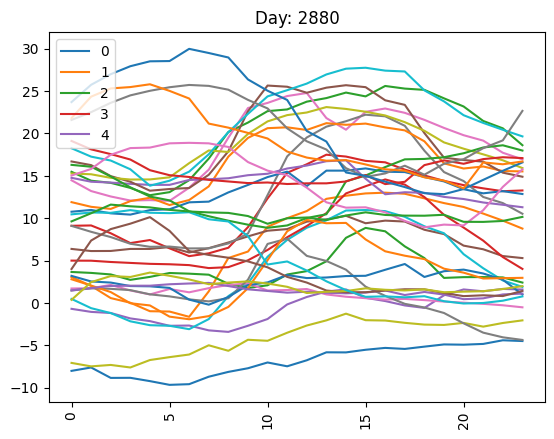

In [106]:
from collections import defaultdict
dict_seasons = defaultdict(list)

for i in range(0, 2920, 90):
    day = i
    season = (day%365)//90
#     print(day, season)
    x_time, y_temp = get_day_data(day=day)
    plot_day(x_time, y_temp, day=day)
    dict_seasons[season].append(y_temp)
plt.legend([0, 1, 2, 3, 4]);


In [110]:
for key in dict_seasons.keys():
    print(key, len(dict_seasons[key]))

0 8
1 8
2 8
3 8
4 1


In [111]:
del(dict_seasons[4]) # only 4 seasons are there

In [112]:
dict_seasons.keys() 
# len(dict_seasons[0])

dict_keys([0, 1, 2, 3])

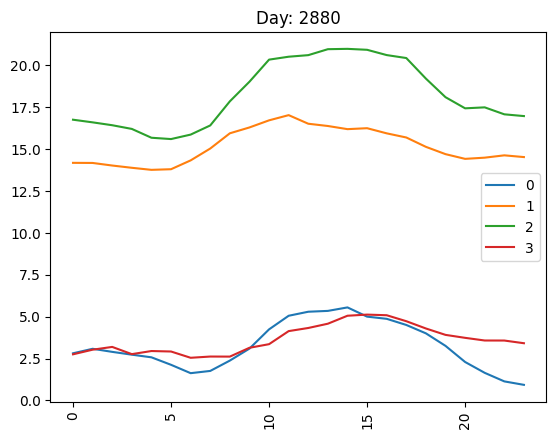

In [113]:
# temperature trend every season
# starting with jan, blue, then spring in orange, then summers in green, again winters in purple, red and blue
# also the peak of temperature happens in the 10-15 time duration, when sun is at the peak. 
for key in dict_seasons.keys():
    data = dict_seasons[key]
    data = np.array(data)
#     print(data.shape)
    data = np.mean(data, axis=0)
    plot_day(x_time, data, day=day)
plt.legend([0, 1, 2, 3, 4]);

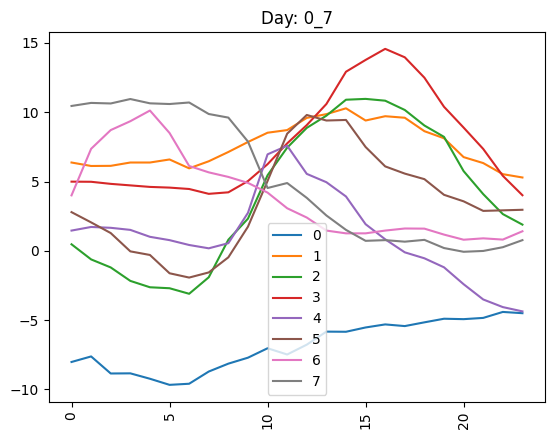

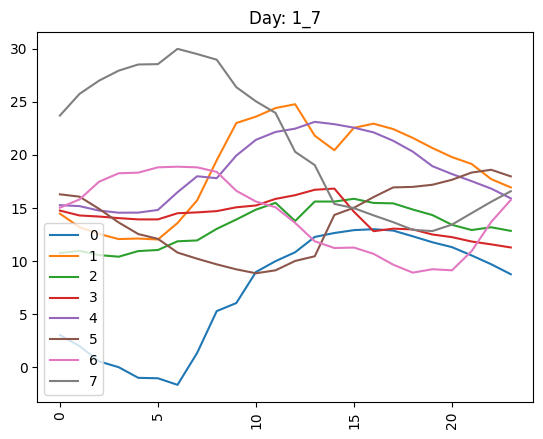

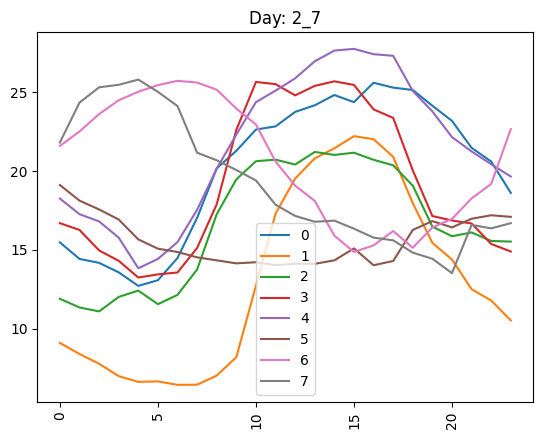

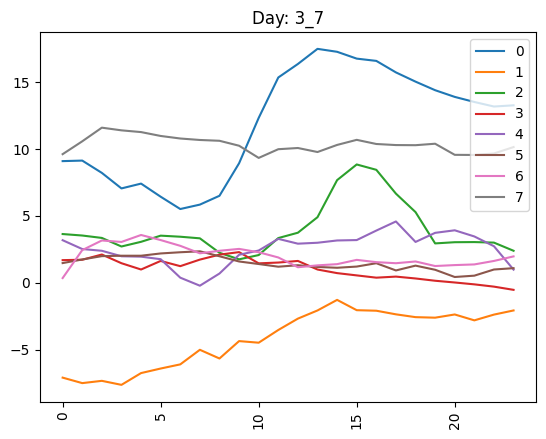

In [120]:
# trend of each year, in the same season
# not much clear, but 7th year is showing increase in temperature, as compared to year 1
for season_key in dict_seasons.keys():
    for year in range(8):
        year_data = dict_seasons[season_key][year]
        plot_day(x_time, year_data, day=f"{season_key}_{year}")
    plt.legend(range(8));
    plt.show()

In [122]:
##  Generating Dataset

In [145]:
"""
Using 200k timestep data only for training
"""
mean = float_data[:200000].mean(axis=0) 
std = float_data[:200000].std(axis=0)

float_data -= mean
float_data /= std

mean,std

(array([ 988.88635885,    9.07734895,  283.14631345,    4.44854725,
          75.35405895,   13.3829553 ,    9.29695535,    4.08591725,
           5.8752111 ,    9.40521005, 1217.51429655,    2.1510037 ,
           3.56950915,  176.21703355]),
 array([ 8.48043388,  8.85249908,  8.95324185,  7.16584991, 16.72731652,
         7.68914559,  4.19808168,  4.84034436,  2.66564926,  4.25206364,
        42.48884277,  1.53666449,  2.33067298, 86.61322998]))

In [136]:
float_data[:200, :2].shape

(200, 2)

In [210]:
# rows: 1440 1444
# (4,)
# range(0, 1440, 6) 1440 1584
# (240, 14) ()
# range(1, 1441, 6) 1441 1585
# (240, 14) ()
# range(2, 1442, 6) 1442 1586
# (240, 14) ()
# range(3, 1443, 6) 1443 1587
# (240, 14) ()
def generator(
    data,
    lookback,
    delay,
    min_ix,
    max_ix,
    shuffle=False,
    batch_size=128,
    step=6
):
    if max_ix is None:
        max_ix = len(data)-delay-1
    
    i = min_ix + lookback
    
    while 1:
        if shuffle:
            rows = np.random.randint(min_ix+lookback, max_ix, size=batch_size)
        else:
            if i+batch_size >= max_ix:
                i = min_ix + lookback
            
#             print("rows:", i, min(i+batch_size, max_ix))
            rows = np.arange(i, min(i+batch_size, max_ix))
            i += len(rows)
        
#         print(rows.shape)
        samples = np.zeros(
            (
                len(rows),
                lookback//step,
                data.shape[-1])
        )
        targets = np.zeros(
            (len(rows),)
        )
        
        for j,row in enumerate(rows):
            sample_idx = range(row-lookback, row,step)
            target_idx = row+delay
            
#             print(sample_idx, row, target_idx)
            samples[j] = data[sample_idx]
            targets[j] = data[target_idx][1]
#             print(samples[j].shape, targets[j].shape)

        yield samples, targets
       
    

for step in tqdm(range(1)):
    samples, targets = next(train_gen)
    preds = samples[:,-1,1]

samples.shape, preds.shape

100%|██████████| 1/1 [00:00<00:00, 826.14it/s]


((4, 240, 14), (4,))

In [229]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_ix=0,
                      max_ix=200000,
                      shuffle=False,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_ix=200001,
                      max_ix=300000,
                      shuffle=False,
                      step=step,
                      batch_size=batch_size)

test_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_ix=300001,
                      max_ix=None,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_steps = (300000-200001-lookback)
test_steps = (len(float_data) - 300001 - lookback)

In [230]:
from tqdm import tqdm 

def evaluate_naive_method():
    batch_maes = []
    for step in tqdm(range(1000)):
        samples, targets = next(val_gen)
        preds = samples[:,-1,1]
        mae = np.mean(np.abs(preds-targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

In [232]:
samples.shape, targets.shape

samples[:,-1,1].shape

(128,)

In [231]:
# taking last value of each batch, as predicting for next day
batch_maes = []
for step in tqdm(range(1000)):
    samples, targets = next(val_gen)
    preds = samples[:,-1,1]
    mae = np.mean(np.abs(preds-targets))
    batch_maes.append(mae)
print(np.mean(batch_maes))

100%|██████████| 1000/1000 [00:07<00:00, 131.89it/s]

0.2854684354139071


In [221]:
# taking first value of each batch, as predicting for next day
batch_maes = []
for step in tqdm(range(1000)):
    samples, targets = next(val_gen)
    preds = samples[:,1,1]
    mae = np.mean(np.abs(preds-targets))
    batch_maes.append(mae)
print(np.mean(batch_maes))

100%|██████████| 1000/1000 [00:00<00:00, 4208.20it/s]

0.7486476348043316


In [159]:
samples.shape # (128, 240, 14)
targets.shape # 128

(128,)

In [161]:
targets

array([-0.15671834, -0.45267996, -0.648105  ,  0.47926026,  1.0982945 ,
        0.60916708,  1.5682183 , -0.23579205,  1.2180347 ,  1.70716211,
        0.807981  , -0.71023435,  1.17397934, -0.56564241,  0.15618765,
        2.05960496,  1.32647865, -1.12141768,  2.1996784 ,  0.41487167,
        0.58318572, -1.08639932,  0.24203912, -0.39393949,  1.37053401,
       -0.57354979,  0.66677793, -0.74073421,  1.81221719,  0.94353594,
        0.59674121,  0.05113257, -1.74158154, -0.1318666 ,  1.64842164,
       -0.45945771, -0.93164076,  1.33438602,  0.76844414,  0.53913036,
        0.32224246, -0.48430945, -0.79721544, -0.27984741,  1.69473624,
        1.00453566,  0.20928   , -0.94406663,  0.94240632, -0.40636536,
        1.57047755,  1.03955402,  2.0245866 ,  0.72212954, -0.58710528,
        0.33127945,  0.85768448, -0.35214338,  0.94014707, -1.67606331,
        0.72438878,  1.22029395, -0.40523573,  1.33212677, -1.14965829,
        0.95031369, -0.92147414, -0.39732836,  0.54477849,  0.80

In [150]:
evaluate_naive_method()

100%|██████████| 1000/1000 [00:08<00:00, 117.09it/s]

0.2881447894756237


In [151]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback//step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen, steps_per_epoch=100, epochs=10, validation_data=val_gen, validation_steps=100)

2024-07-25 15:50:23.867261: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 15:50:23.867472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 15:50:24.058323: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 3.3692 - val_loss: 2.2348
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.7430 - val_loss: 1.2274
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.4059 - val_loss: 1.0526
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.0995 - val_loss: 0.8251
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.8748 - val_loss: 0.6726
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.6703 - val_loss: 0.5684
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.5386 - val_loss: 0.3995
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4220 - val_loss: 0.4036
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3977 - val_loss: 0.3736
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3319 - val_loss: 0.3374


In [222]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3360)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       107,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,172 (840.52 KB)

 Trainable params: 107,585 (420.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,587 (420.27 KB)

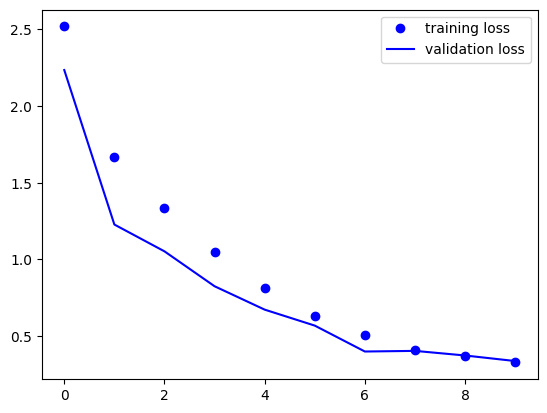

In [152]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.legend()
plt.show()

In [153]:
model.evaluate(test_gen, steps=100)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0513


1.0872207880020142

In [234]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen, steps_per_epoch=500,
                    epochs=10, validation_data=val_gen, validation_steps=500)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 113s 222ms/step - loss: 0.3218 - val_loss: 0.4520
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 210ms/step - loss: 0.2907 - val_loss: 0.3127
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 102s 205ms/step - loss: 0.2991 - val_loss: 0.3826
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 101s 202ms/step - loss: 0.2872 - val_loss: 0.3627
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 101s 201ms/step - loss: 0.2949 - val_loss: 0.3642
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 99s 198ms/step - loss: 0.2859 - val_loss: 0.3147
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 98s 197ms/step - loss: 0.2773 - val_loss: 0.3267
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 98s 197ms/step - loss: 0.2864 - val_loss: 0.3549
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 98s 196ms/step - loss: 0.2827 - val_loss: 0.3633
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 193ms/step - loss: 0.2881 - val_loss: 0.3545


In [233]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 32)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,284 (36.27 KB)

 Trainable params: 4,641 (18.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,643 (18.14 KB)

In [235]:
model.evaluate(test_gen, steps=100)

100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.3801


0.37796878814697266